# Telecom Customer Churn Data Analysis with Python

## Import and Read Data

In [7]:
!pip install pandas

In [9]:
# Upload pandas packages(librairy)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE

In [10]:
# Import cvs file with pandas packages
df=pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Data Understanding
- Get the Data Type
- Returns the dimensions(rows, columns) of the Dataframe
- Returm the first 10 rows of the dataframe
- Returns the column labels of the Dataframe
- Returns the data types of each column
- Checks for missing values in the DataFrame for each column
- Returns summary statistics of numerical columns(Quantitative Variables)

In [13]:
# Data Type
type(df)

pandas.core.frame.DataFrame

In [15]:
# Returns the dimensions(rows, columns) of the Dataframe
df.shape

(7043, 21)

In [17]:
# Returm the first 10 rows of the dataframe
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [19]:
# Returm the last 10 rows of the dataframe
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [21]:
# Returns the column labels of the Dataframe
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
# Returns the data types of each column
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [25]:
# Checks for missing values in the DataFrame for each column
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
# Returns summary statistics of numerical columns(Quantitative Variables)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [29]:
# Display distinct value for each columns
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Preparation
- Dropping irrelevant columns and rows
- Identifying dupplicated rows
- Renaming columns and rows
- Feature Creation

In [33]:
# No Irrelevant columns and rows to drop

In [33]:
# Display 10 first data in Total Charges 
df['TotalCharges'].sample(10)

3857      93.55
1625      655.9
3114     392.65
4905    1158.85
2119      845.6
1709     2093.9
566     1667.25
1142      775.3
3186    1160.75
824     1563.95
Name: TotalCharges, dtype: object

In [35]:
# Convert Total Charges Datatypes object to float 
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan).astype(float)

In [37]:
# Identifying duplicated rows
df.drop_duplicates(inplace=True,keep="first")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [39]:
# Count duplicate in data frame
df.duplicated().sum()

0

## Exploratory Data Analysis(EDA)
We will cover how to visually analyze:
- Categorical variables with bar chart,
- Numerical variables with histograms,
- Relationships between numerical variables with scatter plots, joint plots, and pair plots, and
- Relationships between numerical and categorical variables with box-and-whisker plots and complex conditional plots.

## Univariat Analysis Variables

### Categorical variables with bar chart

In [41]:
import ipywidgets as widgets
print(widgets.__version__)

8.0.0b0


In [47]:
# Display all categorical variables inferior to 6 distincts values
categorical_columns=df.nunique()[df.nunique()<=6].keys().to_list()
categorical_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [49]:
def bar_plot(a):
    df[a].value_counts(normalize = False).plot(kind ='bar')
    plt.ylabel('proportion')
    plt.title('Distribution of '+ str(a))
    return plt.show()

In [51]:
# Interact
interact(bar_plot, a = categorical_columns);

interactive(children=(Dropdown(description='a', options=('gender', 'SeniorCitizen', 'Partner', 'Dependents', '…

### Numerical variables with histograms

In [53]:
# Returns summary statistics of numerical columns(Quantitative Variables)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


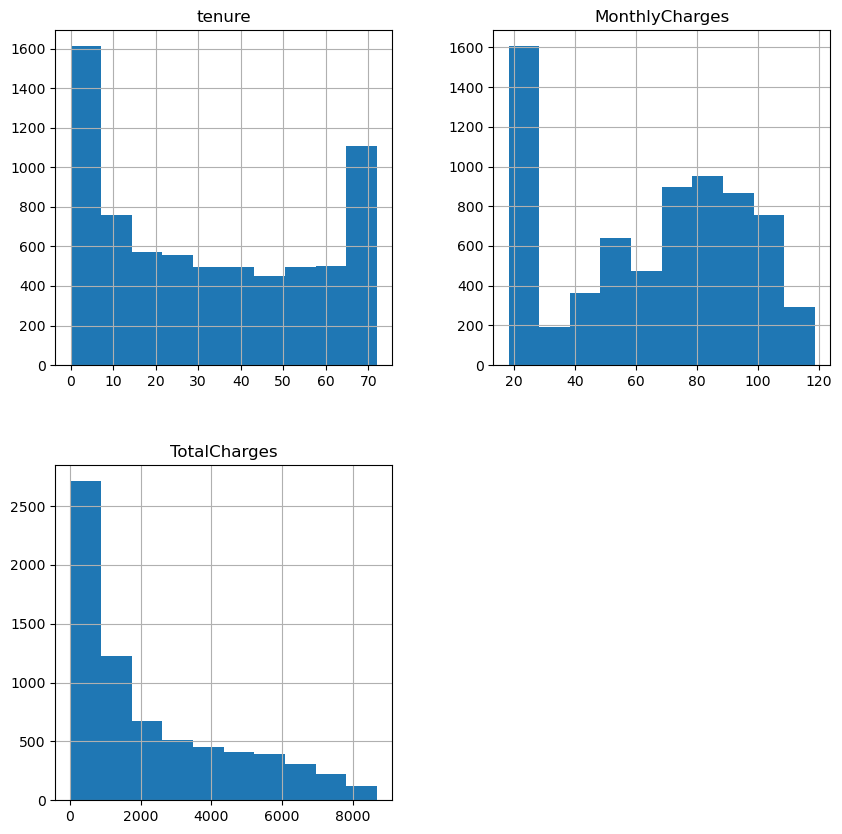

In [55]:
#Divide into NumericalColumns
columns=df.columns.tolist()
# SeniorCitizen is not a numerical or quantitatives columns but Qualitatives columns
num_col_eda=['tenure','MonthlyCharges','TotalCharges']
df[num_col_eda].hist(figsize=(10,10))
plt.show()

In [57]:
# Other Method to dive Categorcal and Numerical Column
cat=[]
num=[]
for column in df.columns:
    if df[column].nunique()>10:
        num.append(column)
    else:
        cat.append(column)

In [59]:
# Display Categorical Value
cat

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [61]:
# Display Numerical Value
num

['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [63]:
# Count and display Churn information(Categorical Column)
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

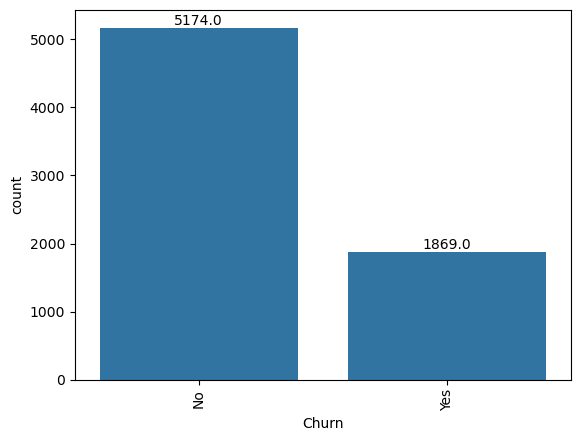

In [65]:
# Display Churn information with Bar Chart 
m=sns.countplot(df, x='Churn')
plt.xticks(rotation=90)
for p in m.patches:
    height = p.get_height()
    m.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)
plt.show()

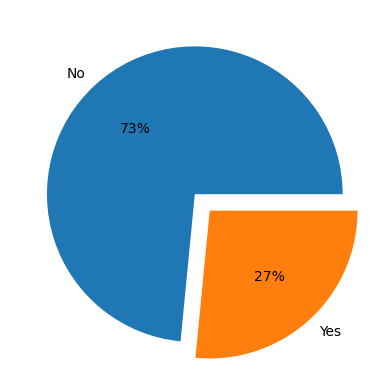

In [67]:
# Display Churn information with Pie Chart 
plt.pie(df['Churn'].value_counts(),labels=['No','Yes'],autopct='%.0f%%', explode=(0.0,0.15))
plt.show()

In [69]:
# Count and display Gender information(Categorical Column)
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

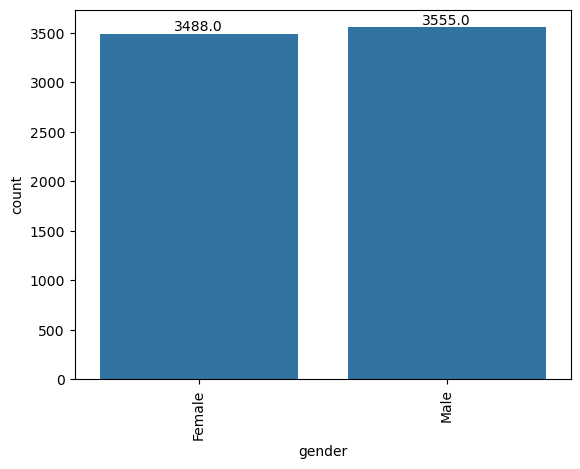

In [71]:
# Display Churn information with Bar Chart 
m=sns.countplot(df, x='gender')
plt.xticks(rotation=90)
for p in m.patches:
    height = p.get_height()
    m.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)
plt.show()

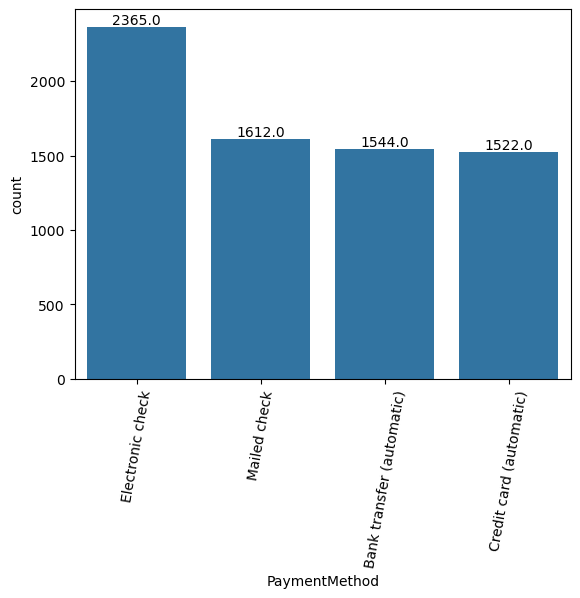

In [73]:
# Display Churn information with Bar Chart 
m=sns.countplot(df, x='PaymentMethod')
plt.xticks(rotation=80)
for p in m.patches:
    height = p.get_height()
    m.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)
plt.show()

<Figure size 1000x600 with 0 Axes>

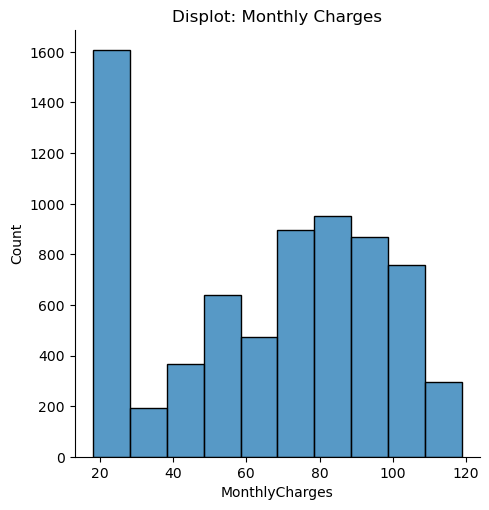

In [75]:
# Display Monthly Charge with displot (Numerical Column)
plt.figure(figsize=(10, 6))
sns.displot(df['MonthlyCharges'],bins=10)
plt.title('Displot: Monthly Charges')
plt.show()

In [77]:
data=df

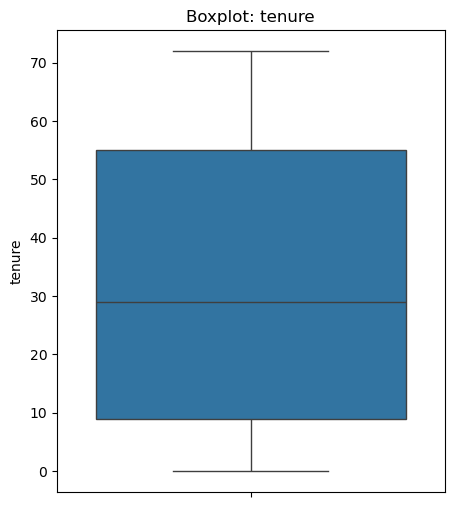

In [79]:
# Dipslay Boxplot tenure information (Numerical column)
plt.figure(figsize=(5, 6))
sns.boxplot(y='tenure',data=df)
plt.title('Boxplot: tenure')
plt.show()

In [129]:
# Dipslay Boxplot Churn information (Categorical column)
#plt.figure(figsize=(6, 6))
#sns.boxplot(df['Churn'],data=df)
#plt.title('Boxplot: Churn')
#plt.show()

## Bivariate Analysis Variables

In [83]:
# Display Churn by Gender(Categorical-Categorical columns)
# Diplay pivot table Churn by Gender
df.pivot_table(index='gender',columns='Churn',values='customerID',aggfunc='count')


Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


<Figure size 600x600 with 0 Axes>

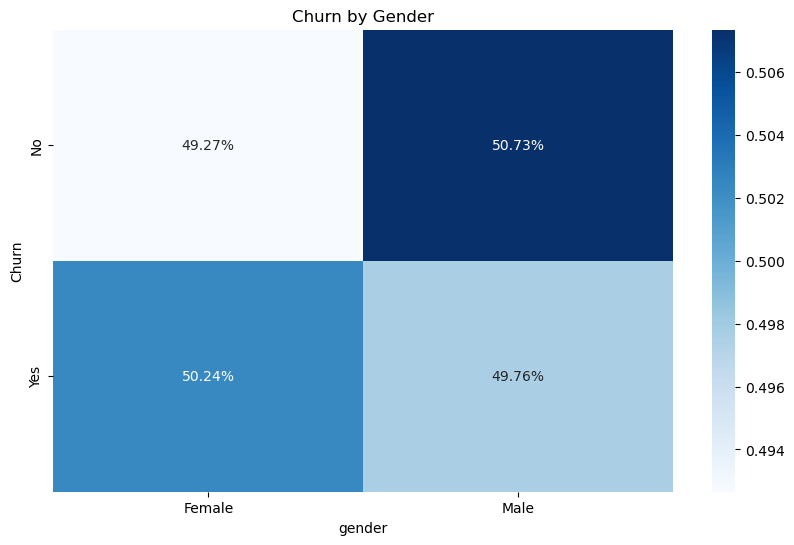

In [85]:
# Display Churn by Gender
cross_tab = pd.crosstab(df['Churn'], df['gender'], values=df['Churn'], aggfunc='count', normalize='index')
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt=".2%", cbar=True)
plt.title('Churn by Gender')
plt.show()

In [87]:
# Dipslay Churn(yes) By Gender that left the service(Categorical-Categorical columns)
df1= df[df['Churn']=="Yes"]
att_cnt=df1['gender'].value_counts()
att_cnt

gender
Female    939
Male      930
Name: count, dtype: int64

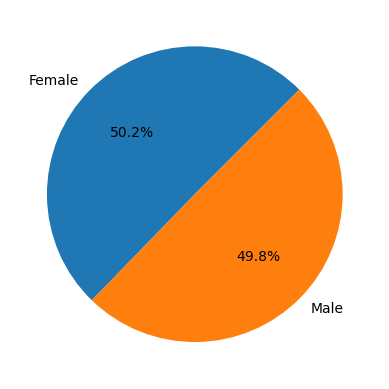

In [89]:
plt.pie(att_cnt, labels=att_cnt.index,autopct='%1.1f%%', startangle=45)
plt.show()

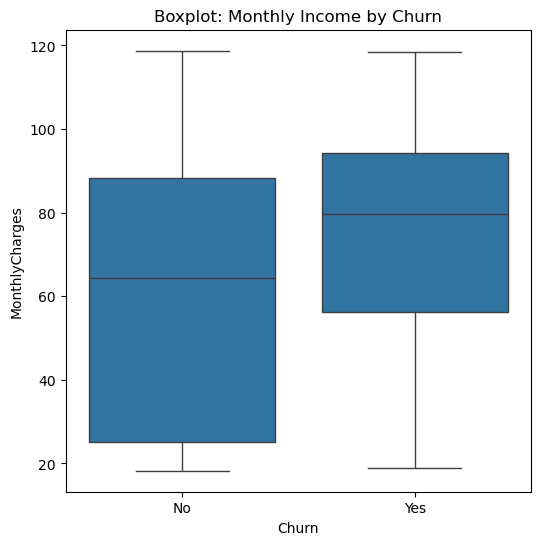

In [91]:
# display Churn by Monthly Charges Boxplot(Categorical-Numerical columns)
plt.figure(figsize=(6, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Boxplot: Monthly Income by Churn')
plt.show()


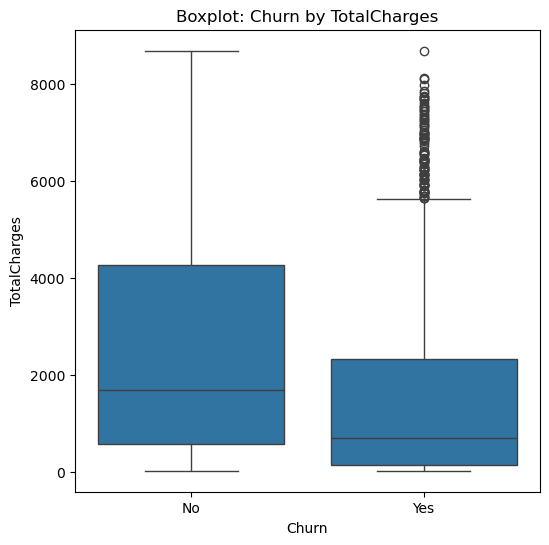

In [93]:
# display Churn by Total Charges(Categorical-Numerical columns)
plt.figure(figsize=(6, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Boxplot: Churn by TotalCharges')
plt.show()

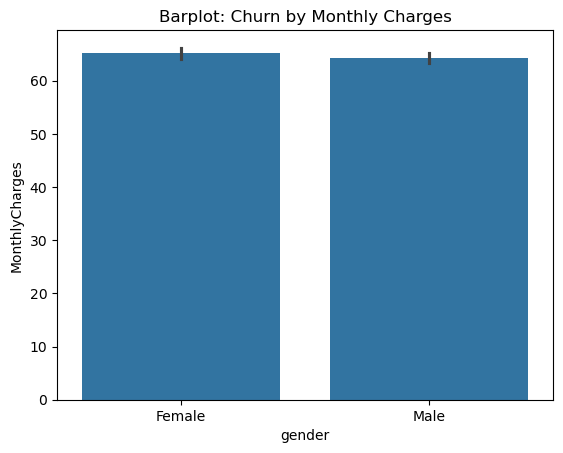

In [95]:
# Display Gender by Monthly Charges information with Bar Chart 
sns.barplot(x='gender', y='MonthlyCharges', data=df)
plt.xticks(rotation=360)
plt.title('Barplot: Churn by Monthly Charges')
plt.show()

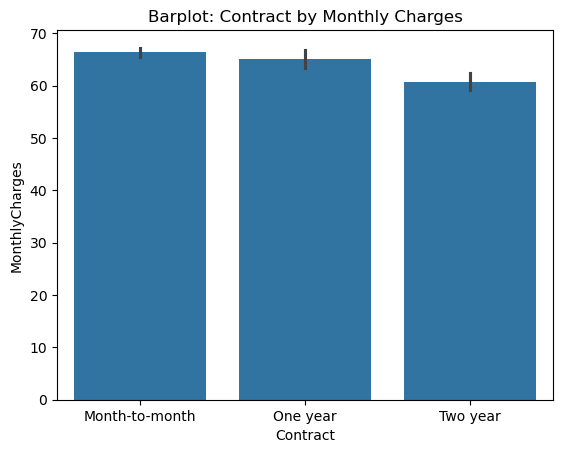

In [97]:
# Display Monthly Charges by contract information with Bar Chart (Categorical-Numerical columns)
sns.barplot(x='Contract', y='MonthlyCharges', data=df)
plt.xticks(rotation=360)
plt.title('Barplot: Contract by Monthly Charges')
plt.show()

In [99]:
df['MonthlyCharges'].sum()

456116.6

In [101]:
# Calculating the MonthlyCharges
TotRevenue=df['MonthlyCharges'].sum()
TotRevenue

456116.6

In [103]:
# Calculating MonthlyCharges by Contract
RevenuebyContract= df.groupby('Contract')['MonthlyCharges'].sum() .sort_values(ascending=False)

In [105]:
RevenuebyContract

Contract
Month-to-month    257294.15
Two year          103005.85
One year           95816.60
Name: MonthlyCharges, dtype: float64

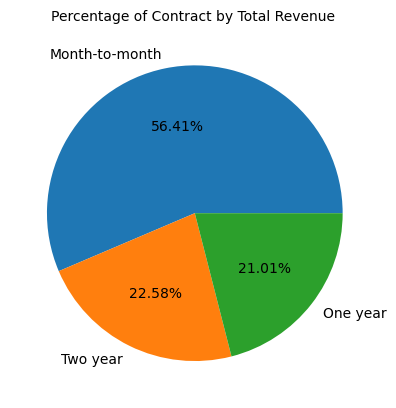

In [107]:
# Display Contract by Total Revenue with Pie Chart (Categorical-Numerical columns)
plt.pie(RevenuebyContract,labels=['Month-to-month','Two year','One year'],autopct = "%1.2f%%")
plt.title("Percentage of Contract by Total Revenue ",fontsize = 10)
plt.show()

In [155]:
#sns.scatterplot(x='Contract',y='MonthlyCharges',data=df)
#plt.show()
#def conv(value):
#    if value == 1:
#        return "yes"
#    else:
#        return "no"
#df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

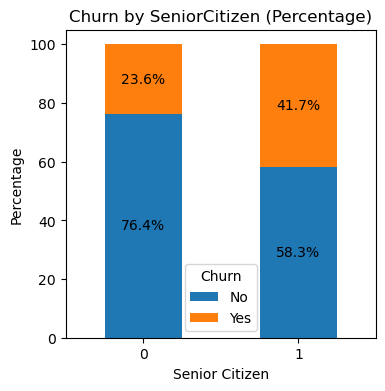

In [109]:
# Diplay Churn percentage by Churn(Categorical-Categorical column)
count_data = df.groupby(['SeniorCitizen','Churn']).size().reset_index(name='counts')

# Calculate total counts for each SeniorCitizen category
total_counts = count_data.groupby('SeniorCitizen')['counts'].transform('sum')

# Calculate percentages
count_data['percentage'] = count_data['counts'] / total_counts * 100

# Pivot the DataFrame for stacked bar plotting
pivot_data = count_data.pivot(index='SeniorCitizen', columns='Churn', values='percentage').fillna(0)

# Plot stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(4, 4))

# Customize the plot
plt.title("Churn by SeniorCitizen (Percentage)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.xticks(rotation=0)

# Add percentage labels to the bars
for i in range(pivot_data.shape[0]):
    cumulative = 0
    for j in range(pivot_data.shape[1]):
        value = pivot_data.iloc[i, j]
        cumulative += value
        plt.text(i, cumulative - value / 2, f"{value:.1f}%", ha='center', va='center')

plt.legend(title='Churn', labels=pivot_data.columns)
plt.show()

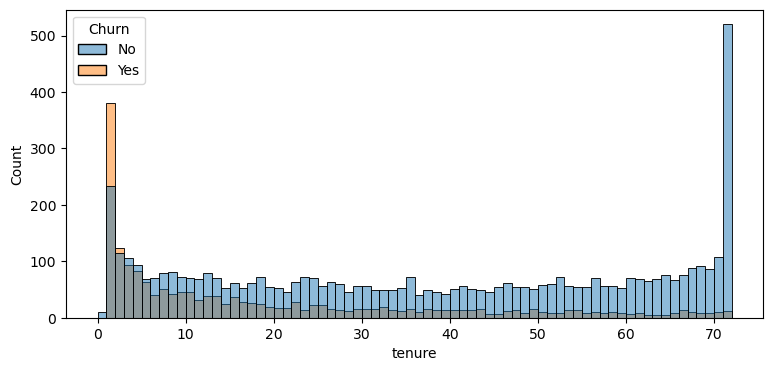

In [111]:
# Display tenure by Churn
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

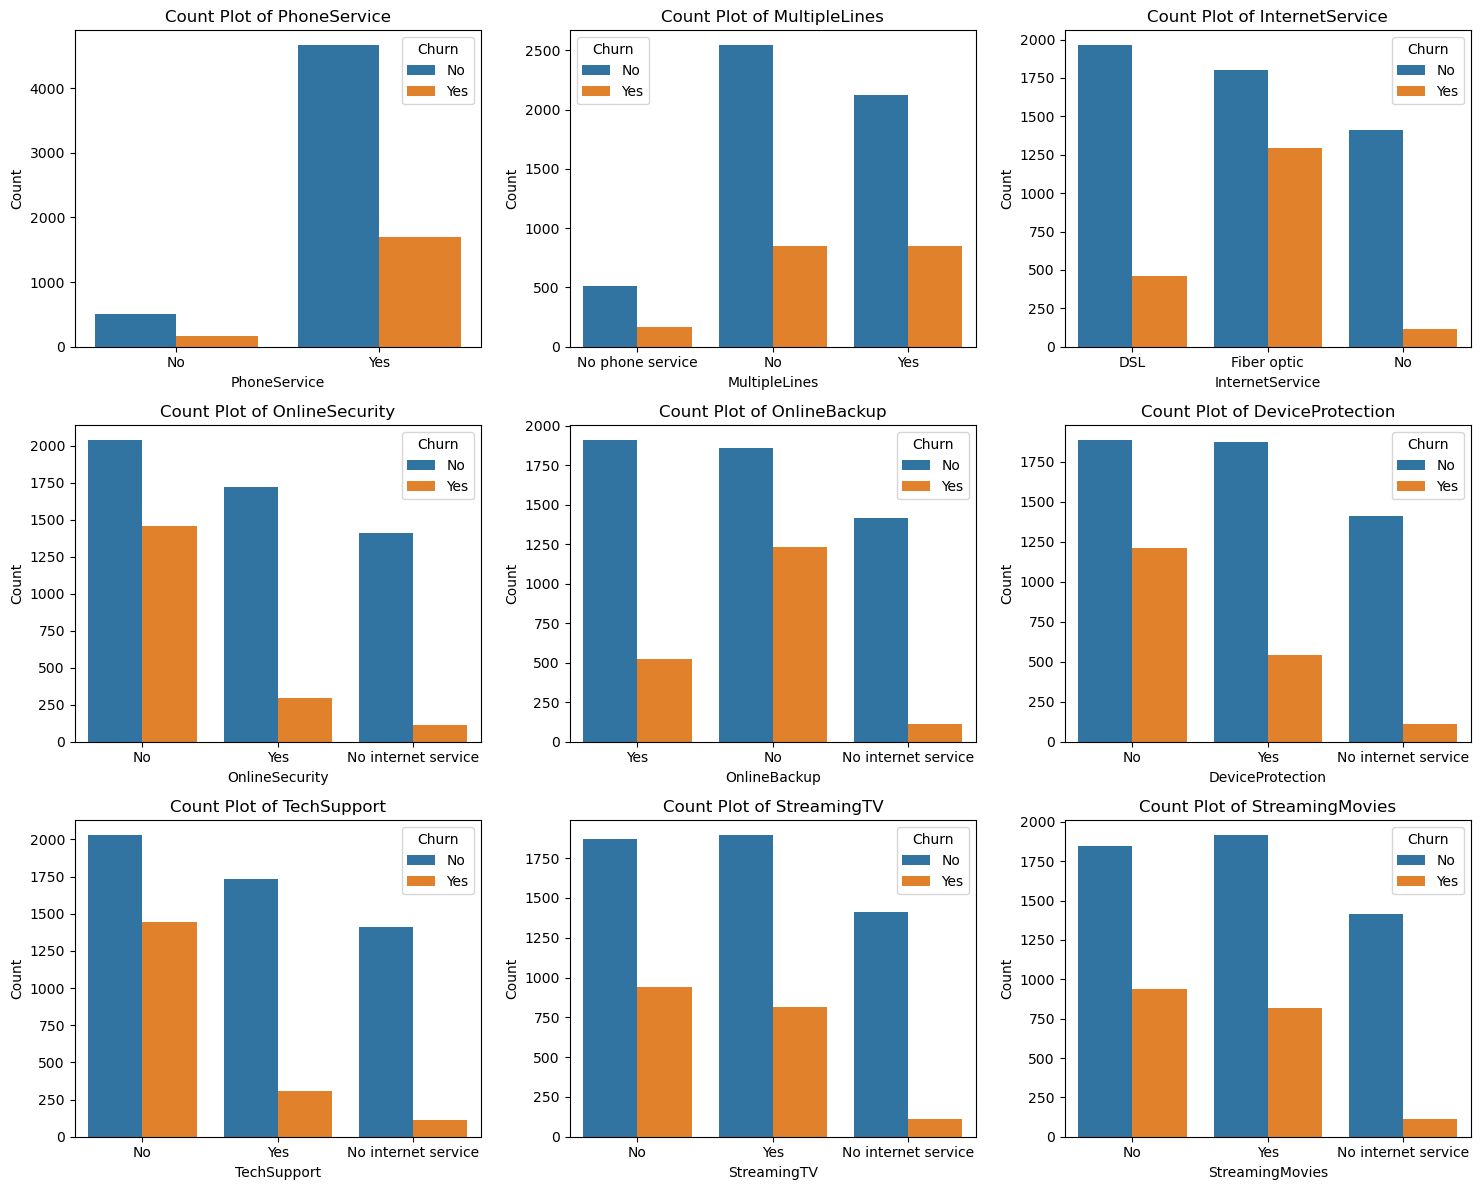

In [113]:
# Display Churn (Categorical-Numerical columns)
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the matplotlib figure
n_cols = 3
n_rows = (len(columns) + n_cols-1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

axes = axes.flatten()

# Create count plots for each column
for ax, col in zip(axes, columns):
    sns.countplot(data=df, x=col, ax=ax, hue = df["Churn"])
    ax.set_title(f'Count Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

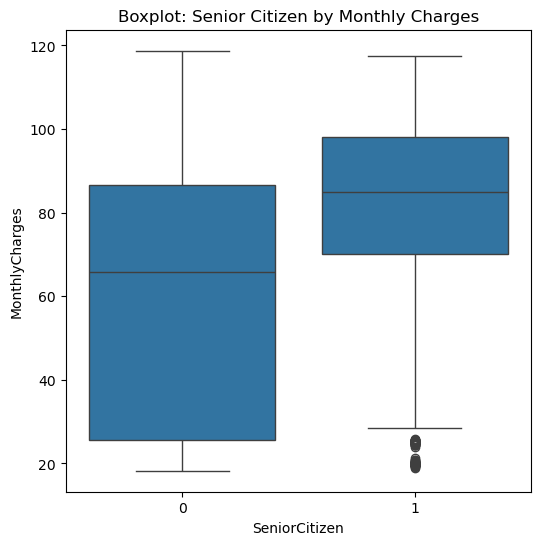

In [115]:
# display Churn by Monthly Charges(Categorical-Numerical columns)
plt.figure(figsize=(6, 6))
sns.boxplot(x='SeniorCitizen', y='MonthlyCharges', data=df)
plt.title('Boxplot: Senior Citizen by Monthly Charges')
plt.show()

## Multivariate Variables Analysis

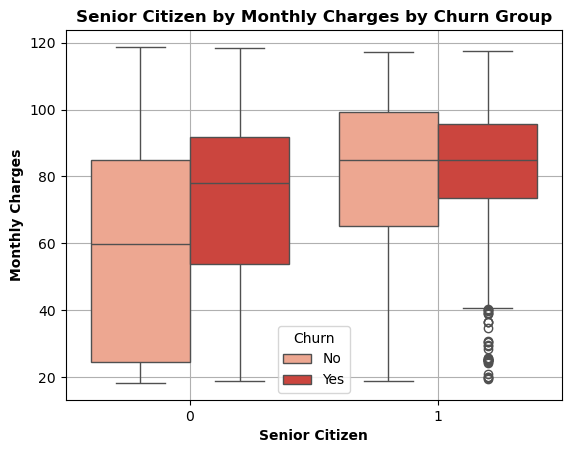

In [117]:
# Histograme display Senior Citizen by Monthly Charges by Churn Group(Categorical-Numerical-Categorical columns)
#plt.figure(figsize=(10,6))
sns.boxplot(data, x="SeniorCitizen",y="MonthlyCharges", hue="Churn", palette="Reds")
plt.title("Senior Citizen by Monthly Charges by Churn Group", color="Black", weight="bold")
plt.xlabel("Senior Citizen", weight="bold")
plt.ylabel("Monthly Charges", weight="bold")
plt.grid()
plt.show()

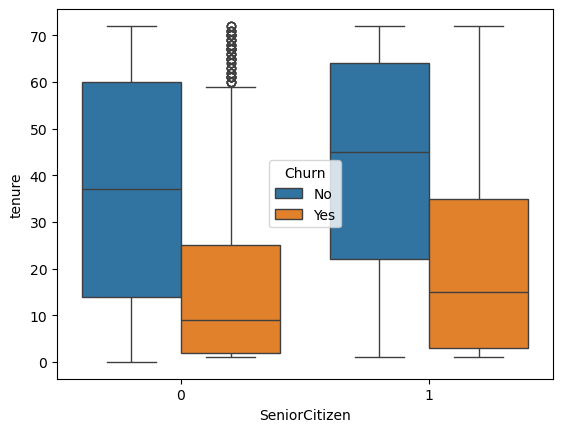

In [119]:
# Boxplot display Senior Citizen by tenure by Churn Group(Categorical-Numerical-Categorical columns)
m=sns.boxplot(x='SeniorCitizen', y='tenure',hue='Churn',data=df)
plt.show()

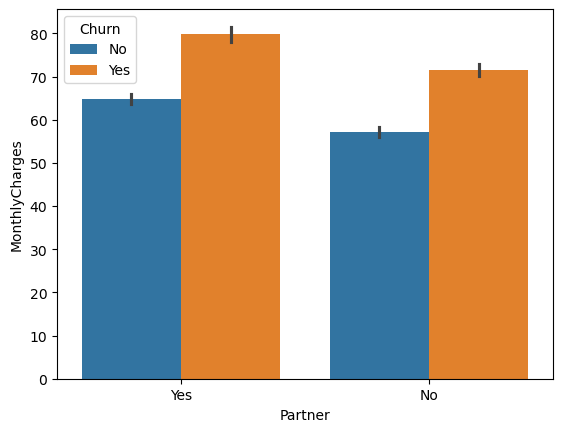

In [125]:
# Barplot display Partner by Monthly Charges by Churn Group(Categorical-Numerical-Categorical columns)
m=sns.barplot(x='Partner', y='MonthlyCharges',hue='Churn',data=df)
plt.show()

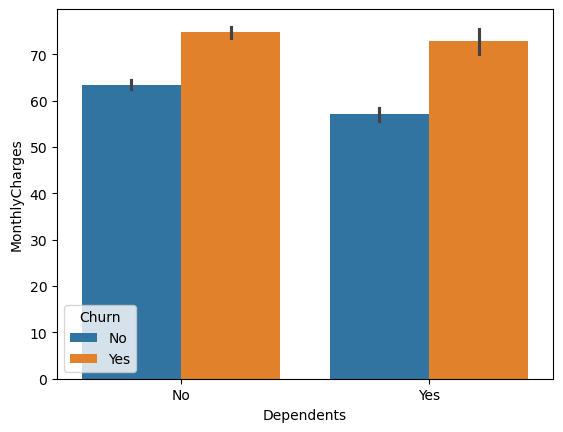

In [127]:
# Barplot display Partner by Monthly Charges by Churn Group(Categorical-Numerical-Categorical columns)
m=sns.barplot(x='Dependents', y='MonthlyCharges',hue='Churn',data=df)
plt.show()